## Normalization

Has part for normal preprocessing, then for tumor samples for PCA

In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import anndata2ri
import logging
from scipy.sparse import issparse

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    # color_map="YlGnBu",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
#anndata2ri.activate()

%load_ext rpy2.ipython

In [3]:
import os

os.environ['PYTHONHASHSEED'] = '0'

In [4]:
def shift_log(adata):
    
    np.random.seed(0)
    
    #p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False)
    
    scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
    # log1p transform
    adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
    axes[0].set_title("Total counts")
    p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
    axes[1].set_title("Shifted logarithm")
    plt.show()
    
    return adata

In [11]:
adata3B = sc.read_h5ad(
    filename="sample_3B/sample3B_quality_control.h5ad")

In [4]:
adata26 = sc.read_h5ad(
    filename="sample_26/sample26_quality_control.h5ad")

In [6]:
adata26.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier,mt_outlier,is_outlier,sample,scDblFinder_score,scDblFinder_class
AAACCCAAGACGCAGT-1,416,6.033086,724.0,6.586172,26.795580,67.0,4.219508,9.254144,182.0,5.209486,25.138123,0.0,0.000000,0.000000,False,False,False,26,0.000124,singlet
AAACCCAAGACTACGG-1,3569,8.180321,16680.0,9.722026,17.883693,553.0,6.317165,3.315348,5576.0,8.626407,33.429256,0.0,0.000000,0.000000,False,False,False,26,0.010236,singlet
AAACCCAAGTCCCGGT-1,7548,8.929170,69740.0,11.152544,18.187554,1357.0,7.213768,1.945799,17457.0,9.767553,25.031546,10.0,2.397895,0.014339,False,False,False,26,0.062422,singlet
AAACCCAAGTTGCCTA-1,1187,7.080026,2492.0,7.821242,19.181380,91.0,4.521789,3.651685,382.0,5.948035,15.329053,1.0,0.693147,0.040128,False,False,False,26,0.001254,singlet
AAACCCAGTGAGAGGG-1,2214,7.703008,7381.0,8.906800,20.891478,261.0,5.568345,3.536106,1964.0,7.583248,26.608860,0.0,0.000000,0.000000,False,False,False,26,0.001474,singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGTAAACGT-1,1537,7.338238,3601.0,8.189244,22.216051,456.0,6.124683,12.663150,621.0,6.432940,17.245209,0.0,0.000000,0.000000,False,False,False,26,0.106057,singlet
TTTGTTGCATTCAGGT-1,4619,8.438150,23538.0,10.066414,14.992778,483.0,6.182085,2.052001,5462.0,8.605753,23.205030,0.0,0.000000,0.000000,False,False,False,26,0.240245,singlet
TTTGTTGGTCAGGAGT-1,4171,8.336151,18478.0,9.824390,22.405022,687.0,6.533789,3.717935,4384.0,8.385945,23.725512,0.0,0.000000,0.000000,False,False,False,26,0.057561,singlet
TTTGTTGTCAGACCTA-1,4357,8.379769,20113.0,9.909171,15.666484,881.0,6.782192,4.380251,4260.0,8.357259,21.180332,0.0,0.000000,0.000000,False,False,False,26,0.354901,singlet


In [7]:
adata27 = sc.read_h5ad(
    filename="sample_27/sample27_quality_control.h5ad")

In [8]:
adata35 = sc.read_h5ad(
    filename="sample_35/sample35_quality_control.h5ad")

In [9]:
adata36 = sc.read_h5ad(
    filename="sample_36/sample36_quality_control.h5ad")

In [10]:
adataTICP32 = sc.read_h5ad(
    filename="sample_TICP32/sampleTICP32_quality_control.h5ad")

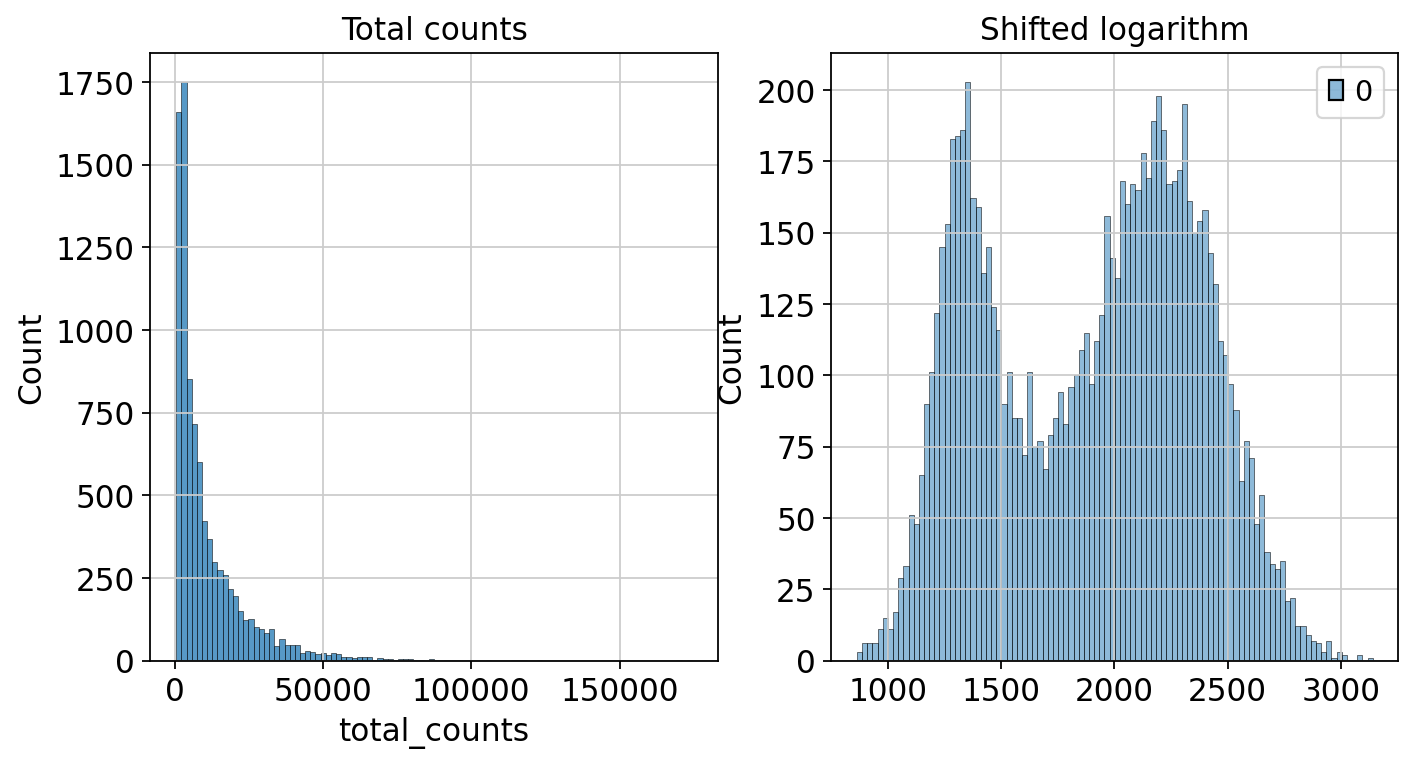

In [11]:
adata3B = shift_log(adata3B)

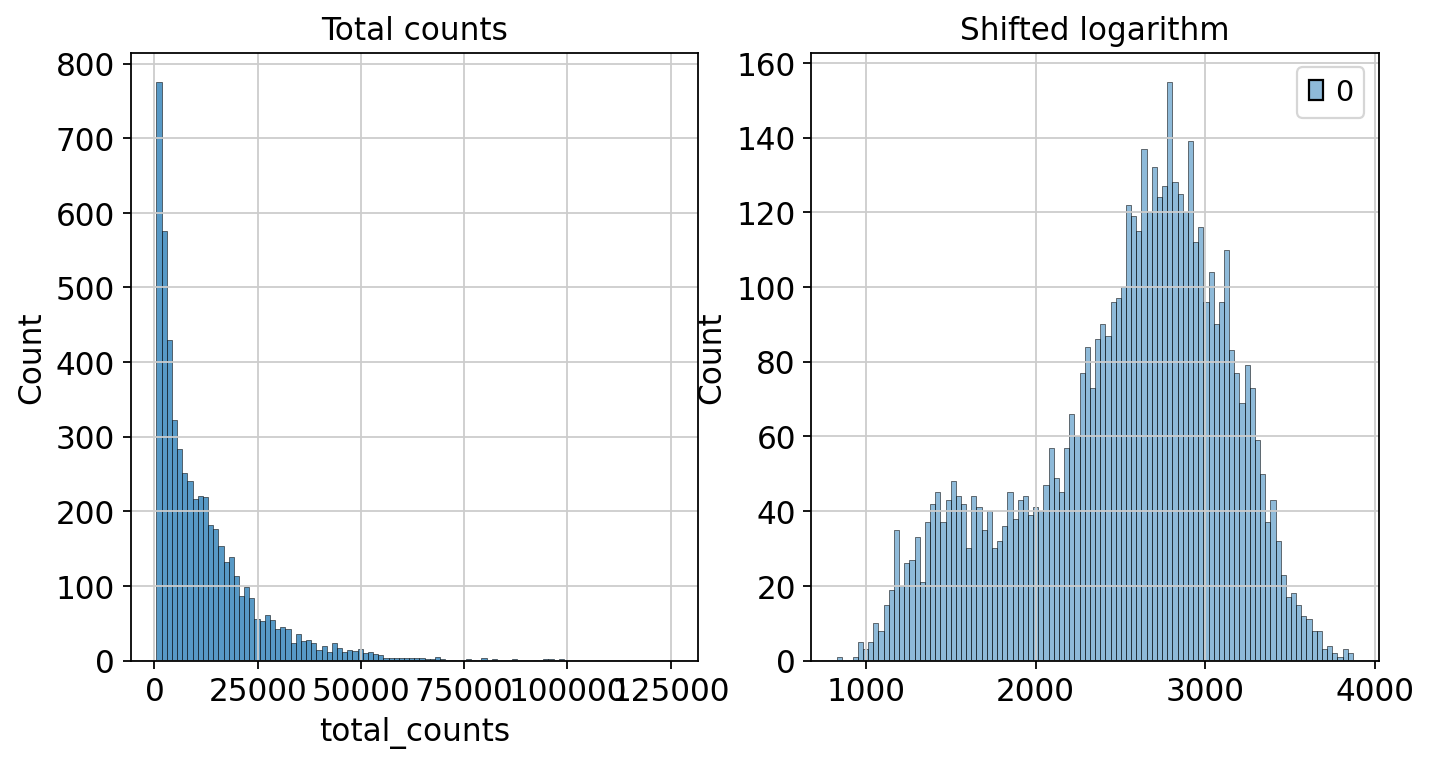

In [12]:
adata26 = shift_log(adata26)

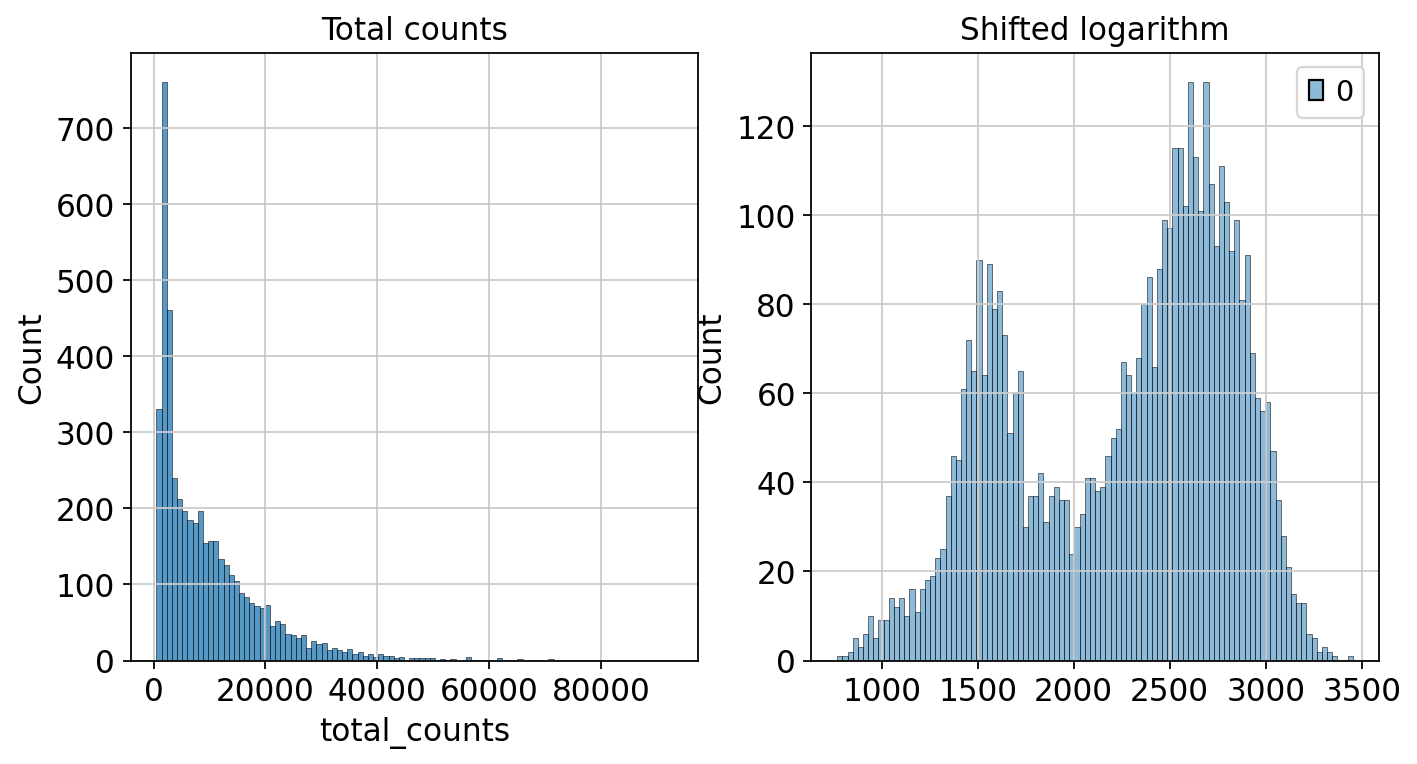

In [13]:
adata27 = shift_log(adata27)

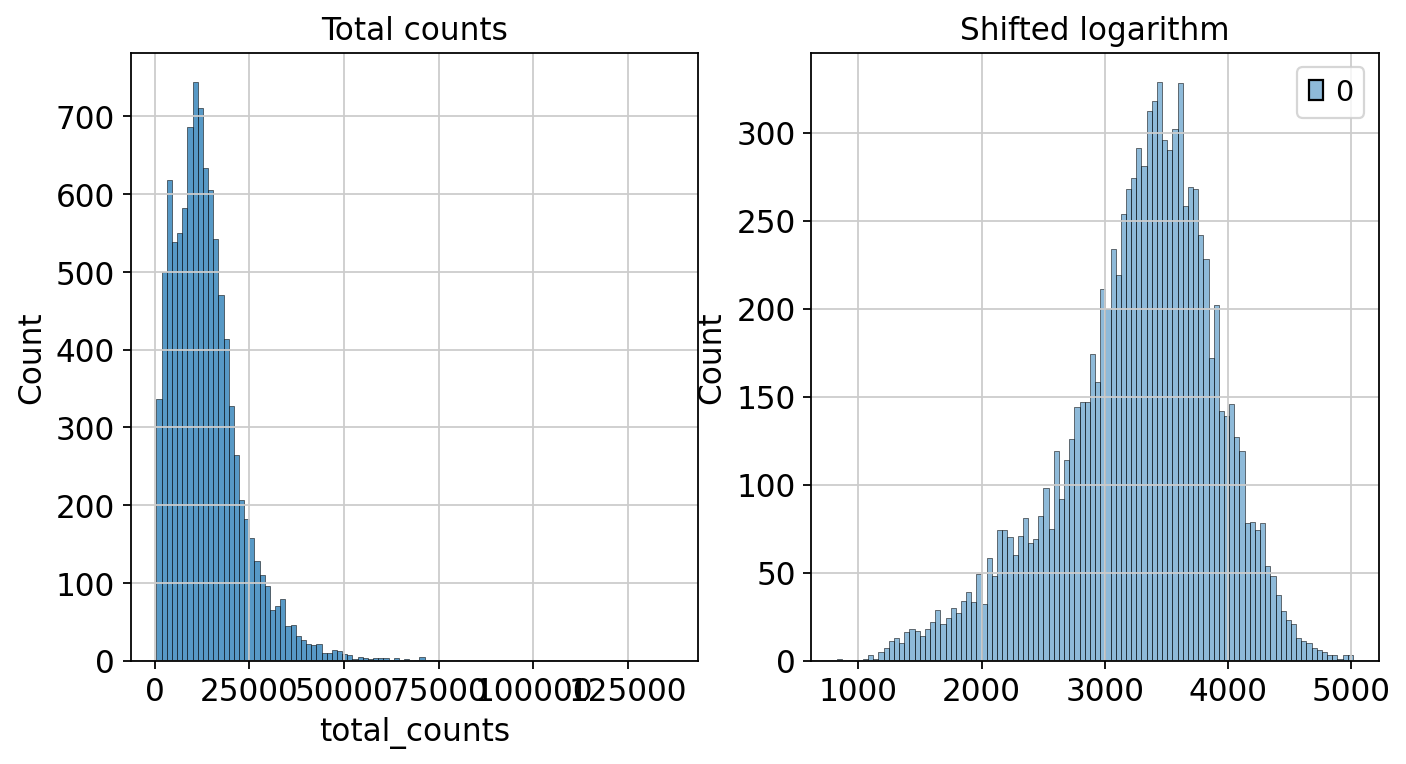

In [14]:
adata36 = shift_log(adata36)

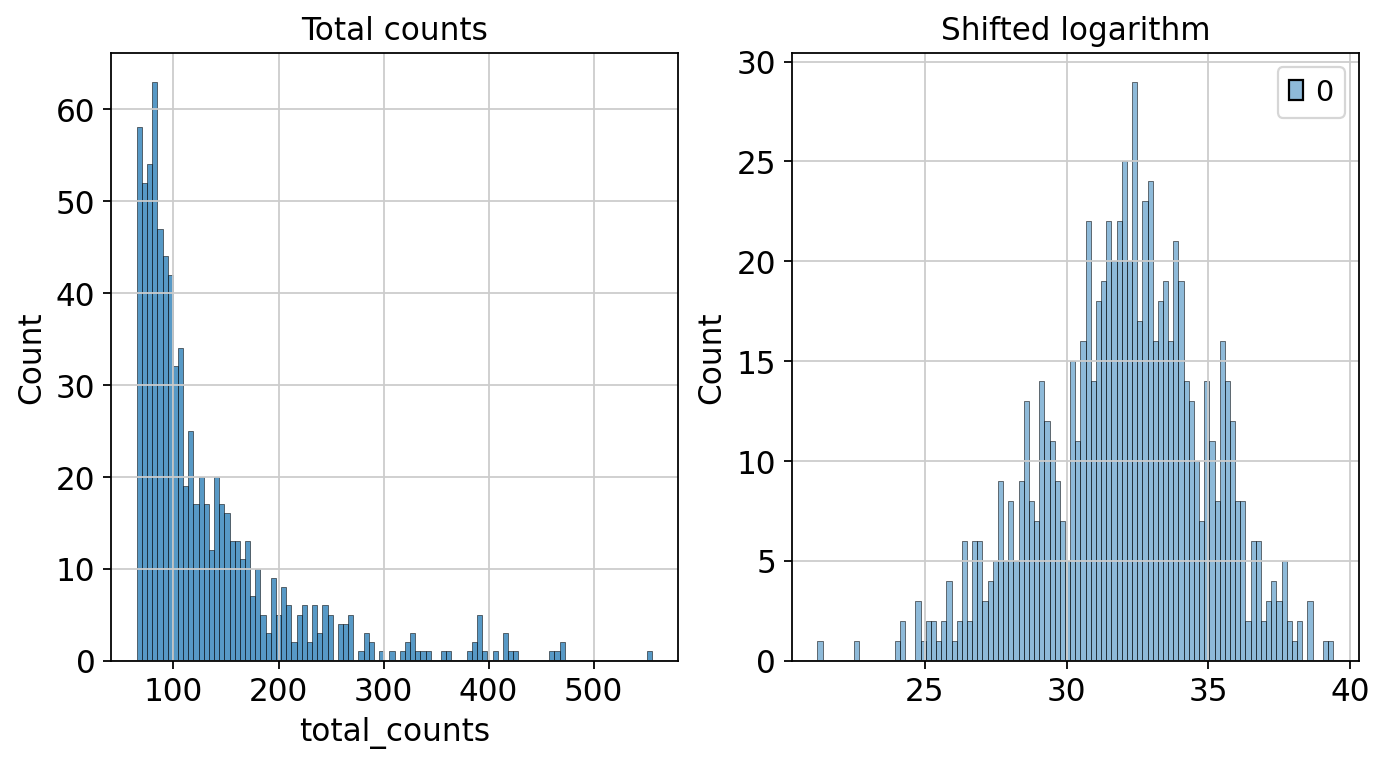

In [15]:
adata35 = shift_log(adata35)

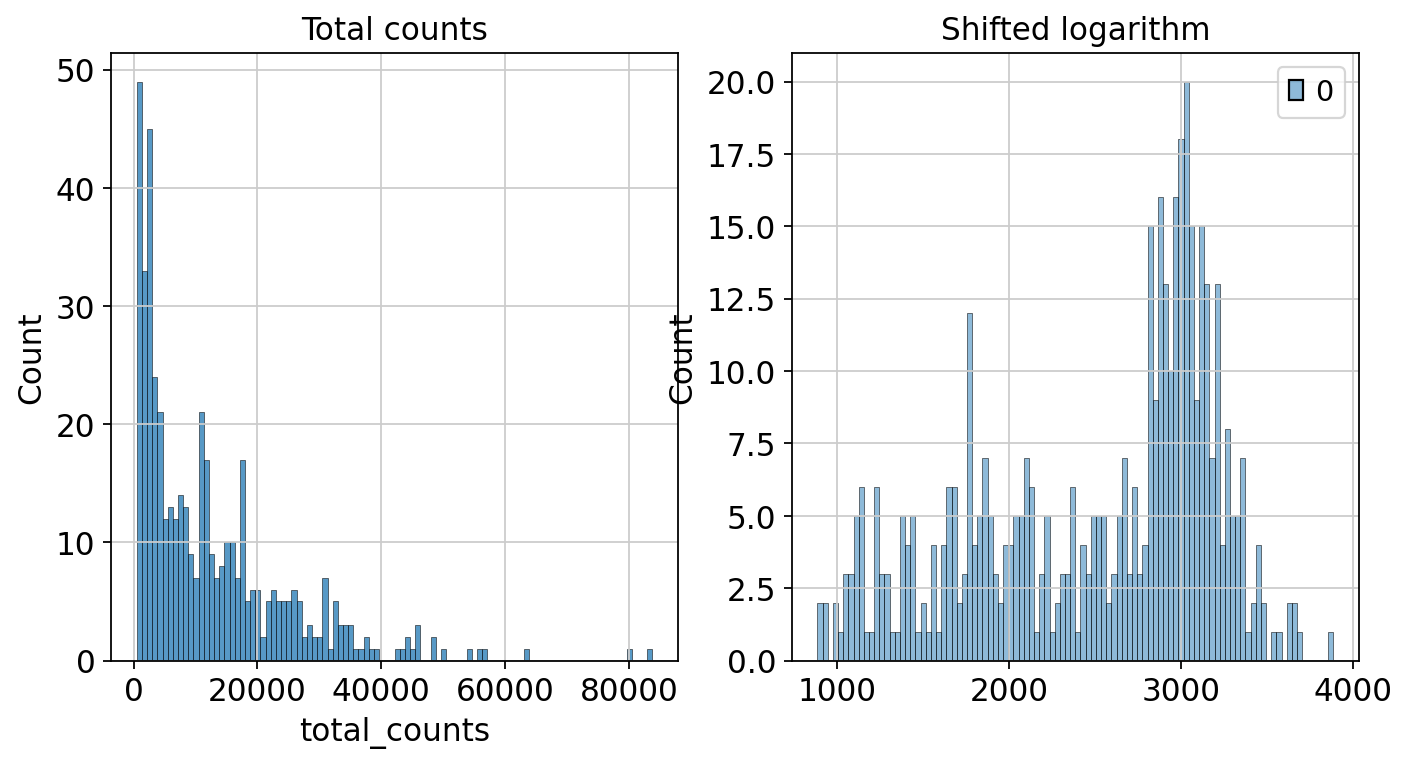

In [16]:
adataTICP32 = shift_log(adataTICP32)

In [17]:
adata3B.write("sample_3B/sample3B_normalization.h5ad")

In [18]:
adata26.write("sample_26/sample26_normalization.h5ad")

In [19]:
adata27.write("sample_27/sample27_normalization.h5ad")

In [20]:
adata35.write("sample_35/sample35_normalization.h5ad")

In [21]:
adata36.write("sample_36/sample36_normalization.h5ad")

In [22]:
adataTICP32.write("sample_TICP32/sampleTICP32_normalization.h5ad")